In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output
import pandas as pd

In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
# Set filepath
REPOSITORY='/home/ebb505/ARE_Project/are-logs/temp_1202/'
FILENAME='MD_Cart_WDH.csv'
AREPUCKFILEPATH='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Puck/'+FILENAME
AREPOTATOFILEPATH='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Potato/'+FILENAME
ARETRICYCLEFILEPATH='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Tricycle/'+FILENAME
OFILE='componentsMedian.csv'
print('Filepath: ' + REPOSITORY)

Filepath: /home/ebb505/ARE_Project/are-logs/temp_1202/


In [3]:
# Get all directories
folders = []
# r=root, d=directories, f = files
for r, d, f in os.walk(REPOSITORY):
    for folder in d:
        folders.append(os.path.join(r, folder))
print("Folders: ", len(folders))

Folders:  20


In [4]:
# Get data evolved robots
my_replicates = []
for f in folders:
    my_list = []
    with open(f + '/' + FILENAME, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    my_replicates.append(my_list)

In [5]:
POPULATION = 25
REPLICATES = len(my_replicates)
#evaluations = len(my_replicates[0])
EVALUATIONS = 4000
FEATURES = len(my_replicates[0][0])
GENERATIONS = int(EVALUATIONS / POPULATION)
interval=1000
rangeValues = range(0,EVALUATIONS,interval)
lenRange = len(rangeValues)
print("Replicates: ", REPLICATES, "Number of evaluations: ", EVALUATIONS, "Features size: ", FEATURES)

Replicates:  20 Number of evaluations:  4000 Features size:  9


In [6]:
# Process data
repplicates_data = []
for rep in range(REPLICATES):
    tempDat = []
    tempDat = np.array([[float(y) for y in x] for x in my_replicates[rep]]) # Convert to array
    repplicates_data.append(tempDat)
print("Done!")

Done!


In [7]:
# Process data
INTERVALS =  np.arange(0,1,1/16)
#INTERVALS = [0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8]
repplicates_organscount = []
for rep in range(REPLICATES):
    tempOrgans = []
    for i in range(4):
        organNumber = []
        for j in INTERVALS:
            organNumber.append(sum(repplicates_data[rep][:,5+i]==j))
        tempOrgans.append(organNumber)
    repplicates_organscount.append(tempOrgans)
    

In [8]:
# Process data
organs_data = []
for rep in range(REPLICATES):
    tempDat = []
    tempDat = np.array([[int(y) for y in x] for x in repplicates_organscount[rep]]) # Convert to array
    organs_data.append(tempDat)
print("Done!")

Done!


In [9]:
wheelCount = []
sensorCount = []
jointCount = []
casterCount = []
for rep in range(REPLICATES):
    tempWheel = []
    tempSensor = []
    tempJoint = []
    tempCaster = []
    for i in range(10):
        tempWheel.append(organs_data[rep][0][i])
        tempSensor.append(organs_data[rep][1][i])
        tempJoint.append(organs_data[rep][2][i])
        tempCaster.append(organs_data[rep][3][i])
    wheelCount.append(tempWheel)
    sensorCount.append(tempSensor)
    jointCount.append(tempJoint)
    casterCount.append(tempCaster)
wheelCount = np.array([[int(y) for y in x] for x in wheelCount]) # Convert to array
sensorCount = np.array([[int(y) for y in x] for x in sensorCount]) # Convert to array
jointCount = np.array([[int(y) for y in x] for x in jointCount]) # Convert to array
casterCount = np.array([[int(y) for y in x] for x in casterCount]) # Convert to array

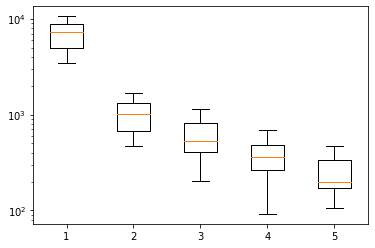

In [10]:
plt.boxplot([wheelCount[:,0],wheelCount[:,1],wheelCount[:,2],wheelCount[:,3],wheelCount[:,4]])
axes = plt.gca()
axes.set_yscale('log')

In [11]:
print(np.median(wheelCount[:,0]),np.median(sensorCount[:,0]),np.median(jointCount[:,0]),np.median(casterCount[:,0]))
print(np.median(wheelCount[:,1]),np.median(sensorCount[:,1]),np.median(jointCount[:,1]),np.median(casterCount[:,1]))
print(np.median(wheelCount[:,2]),np.median(sensorCount[:,2]),np.median(jointCount[:,2]),np.median(casterCount[:,2]))
print(np.median(wheelCount[:,3]),np.median(sensorCount[:,3]),np.median(jointCount[:,3]),np.median(casterCount[:,3]))
print(np.median(wheelCount[:,4]),np.median(sensorCount[:,4]),np.median(jointCount[:,4]),np.median(casterCount[:,4]))
print(np.median(wheelCount[:,5]),np.median(sensorCount[:,5]),np.median(jointCount[:,5]),np.median(casterCount[:,5]))

7238.5 5193.0 2770.5 3762.5
1007.5 1007.5 680.5 866.5
531.0 839.0 774.5 739.0
359.0 686.0 737.0 603.5
196.5 577.0 738.5 465.0
201.5 478.5 621.0 371.0


In [12]:
print(np.std(wheelCount[:,0]))
print(np.std(wheelCount[:,1]))
print(np.std(wheelCount[:,2]))
print(np.std(wheelCount[:,3]))
print(np.std(wheelCount[:,4]))
print(np.std(wheelCount[:,5]))

2042.1343956752698
348.7686339107919
261.53532744162885
158.10199239731293
100.14719167305691
85.02815710104507


In [13]:
# Save to CSV
with open(REPOSITORY + OFILE, 'w', newline='') as write_obj:
    csv_writer = csv.writer(write_obj)
    for i in range(10):
        csv_writer.writerow([np.median(wheelCount[:,i]),np.median(sensorCount[:,i]),np.median(jointCount[:,i]),np.median(casterCount[:,i])])

In [14]:
viableRobots_data = []
for rep in range(REPLICATES):
    tempWheel = repplicates_data[rep][:,5]>0
    tempSensor = repplicates_data[rep][:,6]>0
    tempJoint = repplicates_data[rep][:,7]>0
    viableRobots_data.append(repplicates_data[rep][(tempWheel|tempJoint)&tempSensor])

In [15]:
x = []
print(len(repplicates_data[0][:,5]))
x.extend(repplicates_data[0][:,5])
print(len(x))
# x.extend(repplicates_data[1][:,5])
# print(len(x))

12125
12125


In [19]:
font = {'weight' : 'normal',
            'size'   : 14.0}
plt.rc('font', **font)
plt.figure()

INTERVALS =  np.arange(0,1.0,1/16)
xedges = INTERVALS
yedges = INTERVALS

# x = []
# y = []
# for rep in range(REPLICATES):
#     x.extend(repplicates_data[rep][:,5])
#     y.extend(repplicates_data[rep][:,7])
    
x = []
y = []
for rep in range(REPLICATES):
    x.extend(viableRobots_data[rep][:EVALUATIONS,5])
    y.extend(viableRobots_data[rep][:EVALUATIONS,7])


H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.

# for i in range(len(H)):
#     for j in range(len(H[i])):
        
#         if(H[i,j] > np.max(H)/5):
#             plt.text(j/10*0.63+1/32, i/10*0.63+1/32, str(format(float(H[i,j])/1000, '.1f')), fontsize=12, horizontalalignment='center').set_color('White')
#         else:
#             plt.text(j/10*0.63+1/32, i/10*0.63+1/32, str(format(float(H[i,j])/1000, '.1f')), fontsize=12, horizontalalignment='center').set_color('Black')
                

plt.imshow(H, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Greys')
plt.colorbar(label='Robots')
X, Y = np.meshgrid(xedges, yedges)

plt.xlabel('Wheels')
plt.ylabel('Joints')

plt.title('Only viable robots')

TICKPOS =  np.arange(1/32,1.0,1/16)
TICKLABEL = range(0,16,1)
plt.yticks(TICKPOS, [str(i) for i in TICKLABEL])
plt.xticks(TICKPOS, [str(i) for i in TICKLABEL])

plt.savefig(REPOSITORY+'wheelsViable.png',dpi=200, bbox_inches='tight')